# Analyze Up/Down Scans

## Summary

* Read data
* Locate start/end time for each scan
* Extract individual scans
* Apply corrections for dark, distance, and doppler
* Overplot spectra
* Determine wavelength shift vs. reference spectrum
* Apply wavelength shift
* Investigate any variation

## Preliminaries

In [201]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [202]:
%matplotlib inline

from astropy.io import ascii    
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as plt
from lasp import *

## Read data

In [203]:
upScan = readDatasetByName( 'UpScan')
cleanTelemetry(upScan)
addSpectrum( upScan, sort=True, darkCorrection=True, dopplerCorrection=True, distanceCorrection=True)

In [204]:
downScan = readDatasetByName( 'DownScan')
cleanTelemetry(downScan)
addSpectrum( downScan, sort=True, darkCorrection=True, dopplerCorrection=True, distanceCorrection=True)

In [205]:
addSpectrum( downScan, sort=True, darkCorrection=True, dopplerCorrection=True, distanceCorrection=True)

In [206]:
inFile = indir + 'referenceSpectrum.txt'
referenceSpectrum = ascii.read( inFile)

## Plot all wavelengths

<function matplotlib.pyplot.show>

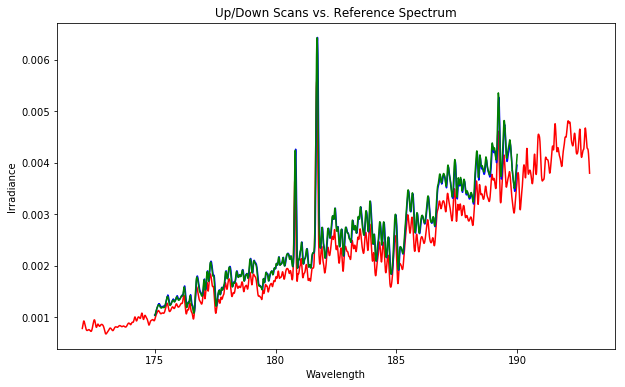

In [207]:
# start figure...
plt.figure(figsize=(10,6))

# plot the reference spectrum, the up scan, and the down scan...
plt.plot( referenceSpectrum['wavelength(nm)'], referenceSpectrum['irradiance (watts/m^2)'], 'r',
         upScan['spectrum']['wavelength(nm)'], upScan['spectrum']['irradiance (watts/m^2)'], 'b',
         downScan['spectrum']['wavelength(nm)'], downScan['spectrum']['irradiance (watts/m^2)'], 'g')

# complete the plot...
plt.xlabel( "Wavelength")
plt.ylabel( "Irradiance")
plt.title( 'Up/Down Scans vs. Reference Spectrum')
# plt.xlim( 180.,182.5)
plt.show

In [208]:
## Plot area around emission lines

<function matplotlib.pyplot.show>

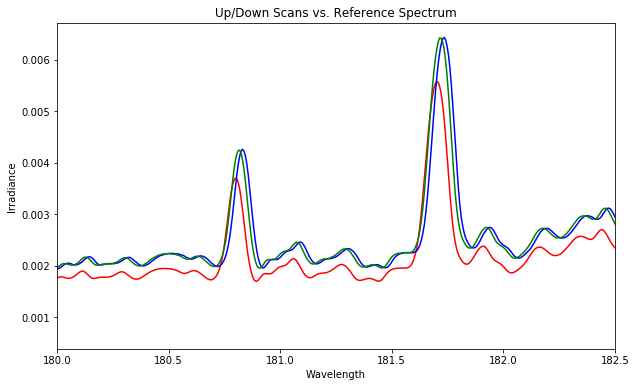

In [209]:
# start figure...
plt.figure(figsize=(10,6))

# plot the reference spectrum, the up scan, and the down scan...
plt.plot( referenceSpectrum['wavelength(nm)'], referenceSpectrum['irradiance (watts/m^2)'], 'r',
         upScan['spectrum']['wavelength(nm)'], upScan['spectrum']['irradiance (watts/m^2)'], 'b',
         downScan['spectrum']['wavelength(nm)'], downScan['spectrum']['irradiance (watts/m^2)'], 'g')

# complete the plot...
plt.xlabel( "Wavelength")
plt.ylabel( "Irradiance")
plt.title( 'Up/Down Scans vs. Reference Spectrum')
plt.xlim( 180.,182.5)
plt.show

## Measure center of reference spectrum

Reference: xc=181.7013 amp=0.003679


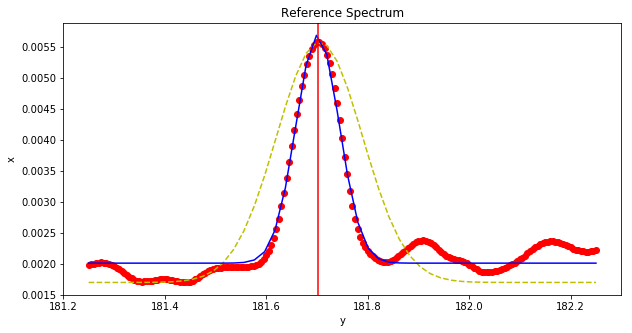

In [210]:
# define wavelength range to consider...
wMin = 181.25
wMax = 182.25

# fit a Gaussian curve to spectrum...
x,y = getRegionOfInterest( referenceSpectrum['wavelength(nm)'], 
                           referenceSpectrum['irradiance (watts/m^2)'], wMin, wMax)
xcRef,ampRef = getCenter( x, y, fwhm=0.2, plot=True, title='Reference Spectrum')
print 'Reference: xc=%.4f amp=%f' % (xcRef,ampRef)

## Measure centers of other spectra and shift wavelengths

Reference center =181.7013 nm
UpScan center    =181.7321 nm
Wavelength offset=-0.0307 nm


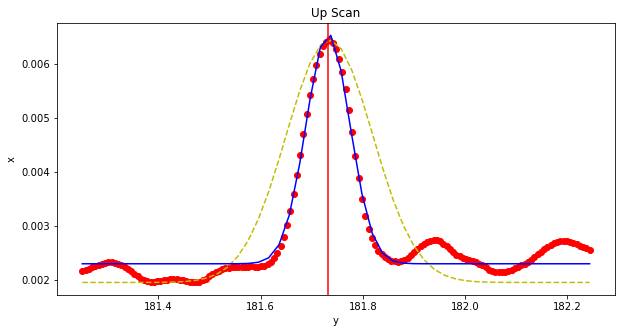

In [211]:
# fit a Gaussian curve to up
x,y = getRegionOfInterest( upScan['spectrum']['wavelength(nm)'], 
                           upScan['spectrum']['irradiance (watts/m^2)'], wMin, wMax)
xcUp,ampUp = getCenter( x, y, fwhm=0.2, plot=True, title='Up Scan')
shift = xcRef - xcUp
upScan['spectrum']['wavelength(nm)'] += shift

print 'Reference center =%.4f nm' % xcRef
print 'UpScan center    =%.4f nm' % xcUp
print 'Wavelength offset=%.4f nm' % shift

Reference center =181.7013 nm
DownScan center  =181.7163 nm
Wavelength offset=-0.0150 nm


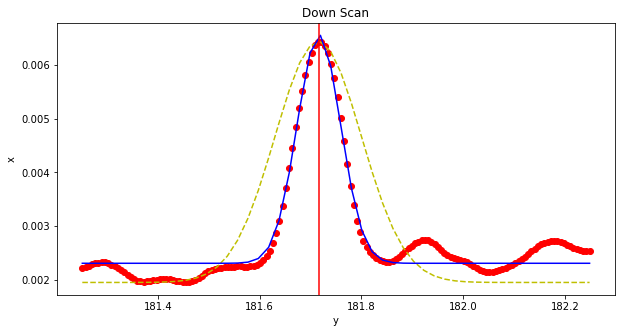

In [212]:
# fit a Gaussian curve to down
x,y = getRegionOfInterest( downScan['spectrum']['wavelength(nm)'], 
                           downScan['spectrum']['irradiance (watts/m^2)'], wMin, wMax)
xcDown,ampDown = getCenter( x, y, fwhm=0.2, plot=True, title='Down Scan')
shift = xcRef - xcDown
downScan['spectrum']['wavelength(nm)'] += shift

print 'Reference center =%.4f nm' % xcRef
print 'DownScan center  =%.4f nm' % xcDown
print 'Wavelength offset=%.4f nm' % shift

## Plot Up/Down Scans vs. reference spectrum

<function matplotlib.pyplot.show>

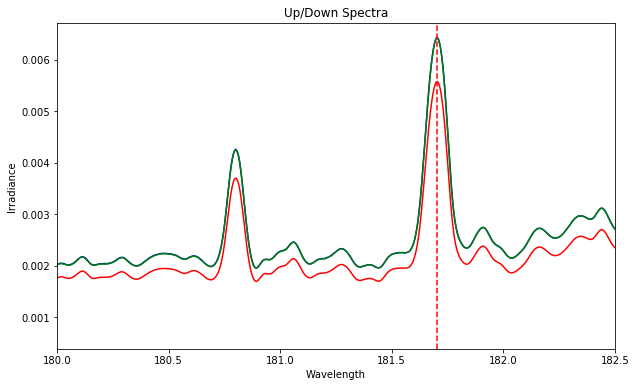

In [213]:
# start figure...
plt.figure(figsize=(10,6))

# plot the reference spectrum...
plt.plot( referenceSpectrum['wavelength(nm)'], referenceSpectrum['irradiance (watts/m^2)'], 'r',
        upScan['spectrum']['wavelength(nm)'], upScan['spectrum']['irradiance (watts/m^2)'], 'b',
        downScan['spectrum']['wavelength(nm)'], downScan['spectrum']['irradiance (watts/m^2)'], 'g')
plt.xlabel( referenceSpectrum.colnames[0])
plt.ylabel( referenceSpectrum.colnames[1])

# complete the plot...
plt.xlabel( "Wavelength")
plt.ylabel( "Irradiance")
plt.title( 'Up/Down Spectra')
plt.xlim( 180.,182.5)
plt.axvline(x=xcRef, color='r', linestyle='dashed')
plt.show

## Compute and plot ratio of UpScan vs. reference spectrum

In [214]:
# resample reference spectrum to align with scan
resampledReferenceSpectrumIrradiance = np.interp( upScan['spectrum']['wavelength(nm)'], 
                                                  referenceSpectrum['wavelength(nm)'], 
                                                  referenceSpectrum['irradiance (watts/m^2)'])

# compute ratio...
ratioSpectrum = Table()
ratioSpectrum['wavelength(nm)'] = upScan['spectrum']['wavelength(nm)']
ratioSpectrum['irradiance ratio'] = \
    upScan['spectrum']['irradiance (watts/m^2)'] / resampledReferenceSpectrumIrradiance

<function matplotlib.pyplot.show>

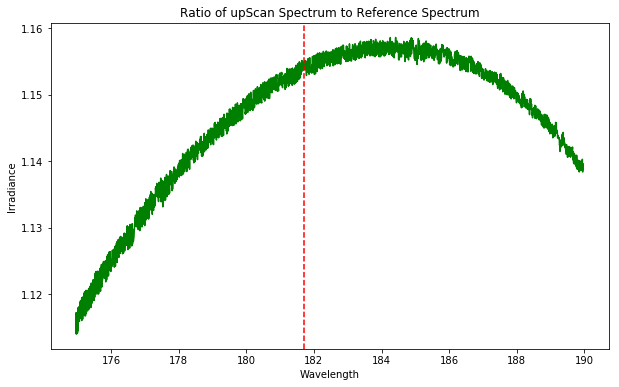

In [215]:
# start figure...
plt.figure(figsize=(10,6))

# plot the reference spectrum...
plt.plot( ratioSpectrum['wavelength(nm)'], ratioSpectrum['irradiance ratio'], 'g')
plt.xlabel( referenceSpectrum.colnames[0])
plt.ylabel( referenceSpectrum.colnames[1])

# complete the plot...
plt.xlabel( "Wavelength")
plt.ylabel( "Irradiance")
plt.title( 'Ratio of upScan Spectrum to Reference Spectrum')
plt.axvline(x=xcRef, color='r', linestyle='dashed')
plt.show

### Compare ratio to other quantities to determine source of variation

In [216]:
# add time to ratioSpectrum...
ratioSpectrum['microsecondsSinceGpsEpoch'] = upScan['spectrum']['microsecondsSinceGpsEpoch']

<function matplotlib.pyplot.show>

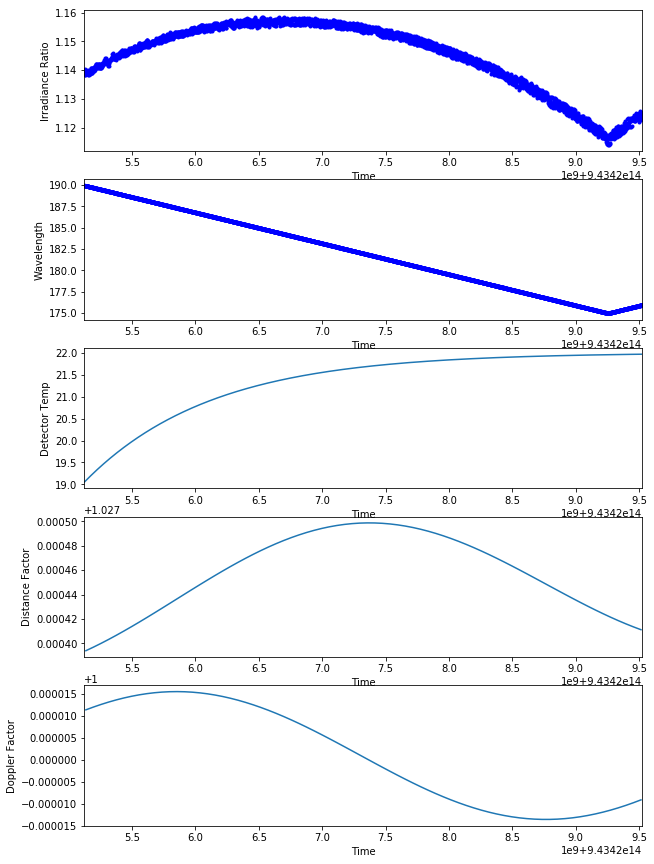

In [217]:
plt.figure(figsize=(10,15))

# plot ratio vs. time...
minTime = np.min(ratioSpectrum['microsecondsSinceGpsEpoch'])
maxTime = np.max(ratioSpectrum['microsecondsSinceGpsEpoch'])

# plot ratioSpectrum
plt.subplot(5, 1, 1)
plt.plot( ratioSpectrum['microsecondsSinceGpsEpoch'], ratioSpectrum['irradiance ratio'], 'b.')
plt.ylabel( "Irradiance Ratio")
plt.xlabel( "Time")
plt.xlim( minTime, maxTime)

# plot doppler correction...
plt.subplot(5, 1, 5)
plt.plot( upScan['distanceAndDoppler']['microsecondsSinceGpsEpoch'], 
         upScan['distanceAndDoppler']['sunObserverDopplerFactor'])
plt.xlabel( "Time")
plt.ylabel( "Doppler Factor")
plt.xlim( minTime, maxTime)

# plot distance correction...
plt.subplot(5, 1, 4)
plt.plot( upScan['distanceAndDoppler']['microsecondsSinceGpsEpoch'], 
         upScan['distanceAndDoppler']['sunObserverDistanceCorrection'])
plt.xlabel( "Time")
plt.ylabel( "Distance Factor")
plt.xlim( minTime, maxTime)

# plot distance correction...
plt.subplot(5, 1, 3)
plt.plot( upScan['detectorTemp']['microsecondsSinceGpsEpoch'], 
         upScan['detectorTemp']['temp (C)'])
plt.xlabel( "Time")
plt.ylabel( "Detector Temp")
plt.xlim( minTime, maxTime)

# plot wavelength variation...
plt.subplot(5, 1, 2)
plt.plot( ratioSpectrum['microsecondsSinceGpsEpoch'], ratioSpectrum['wavelength(nm)'], 'b.')
plt.ylabel( "Wavelength")
plt.xlabel( "Time")
plt.xlim( minTime, maxTime)

plt.show

## Compute and plot ratio of DownScan vs. reference spectrum

In [218]:
# resample reference spectrum to align with scan
resampledReferenceSpectrumIrradiance = np.interp( downScan['spectrum']['wavelength(nm)'], 
                                                  referenceSpectrum['wavelength(nm)'], 
                                                  referenceSpectrum['irradiance (watts/m^2)'])

# compute ratio...
ratioSpectrum = Table()
ratioSpectrum['wavelength(nm)'] = downScan['spectrum']['wavelength(nm)']
ratioSpectrum['irradiance ratio'] = \
    downScan['spectrum']['irradiance (watts/m^2)'] / resampledReferenceSpectrumIrradiance

<function matplotlib.pyplot.show>

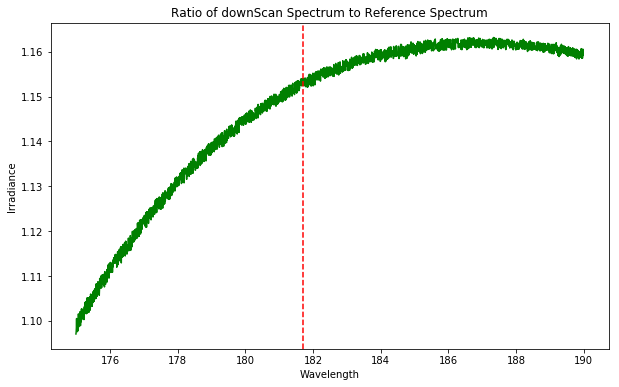

In [219]:
# start figure...
plt.figure(figsize=(10,6))

# plot the reference spectrum...
plt.plot( ratioSpectrum['wavelength(nm)'], ratioSpectrum['irradiance ratio'], 'g')
plt.xlabel( referenceSpectrum.colnames[0])
plt.ylabel( referenceSpectrum.colnames[1])

# complete the plot...
plt.xlabel( "Wavelength")
plt.ylabel( "Irradiance")
plt.title( 'Ratio of downScan Spectrum to Reference Spectrum')
plt.axvline(x=xcRef, color='r', linestyle='dashed')
plt.show

### Compare ratio to other quantities to determine source of variation

In [220]:
# add time to ratioSpectrum...
ratioSpectrum['microsecondsSinceGpsEpoch'] = downScan['spectrum']['microsecondsSinceGpsEpoch']

<function matplotlib.pyplot.show>

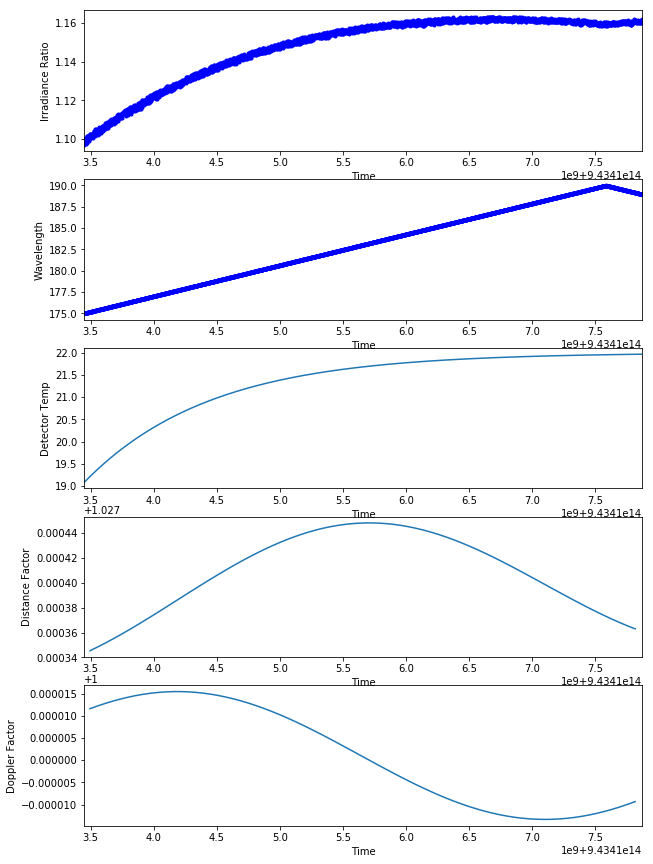

In [221]:
plt.figure(figsize=(10,15))

# get x-axis plot limits...
minTime = np.min(ratioSpectrum['microsecondsSinceGpsEpoch'])
maxTime = np.max(ratioSpectrum['microsecondsSinceGpsEpoch'])

# plot ratioSpectrum
plt.subplot(5, 1, 1)
plt.plot( ratioSpectrum['microsecondsSinceGpsEpoch'], ratioSpectrum['irradiance ratio'], 'b.')
plt.ylabel( "Irradiance Ratio")
plt.xlabel( "Time")
plt.xlim( minTime, maxTime)

# plot doppler correction...
plt.subplot(5, 1, 5)
plt.plot( downScan['distanceAndDoppler']['microsecondsSinceGpsEpoch'], 
         downScan['distanceAndDoppler']['sunObserverDopplerFactor'])
plt.xlabel( "Time")
plt.ylabel( "Doppler Factor")
plt.xlim( minTime, maxTime)

# plot distance correction...
plt.subplot(5, 1, 4)
plt.plot( downScan['distanceAndDoppler']['microsecondsSinceGpsEpoch'], 
         downScan['distanceAndDoppler']['sunObserverDistanceCorrection'])
plt.xlabel( "Time")
plt.ylabel( "Distance Factor")
plt.xlim( minTime, maxTime)

# plot distance correction...
plt.subplot(5, 1, 3)
plt.plot( downScan['detectorTemp']['microsecondsSinceGpsEpoch'], 
         downScan['detectorTemp']['temp (C)'])
plt.xlabel( "Time")
plt.ylabel( "Detector Temp")
plt.xlim( minTime, maxTime)

# plot wavelength variation...
plt.subplot(5, 1, 2)
plt.plot( ratioSpectrum['microsecondsSinceGpsEpoch'], ratioSpectrum['wavelength(nm)'], 'b.')
plt.ylabel( "Wavelength")
plt.xlabel( "Time")
plt.xlim( minTime, maxTime)

plt.show

## Conclusions


* The UpScan and DownScan spectra were generally consistent with the reference spectra in terms of wavelength and position of spectral features.
* The UpScan was offset by 0.0307 nm from the reference spectrum
* The DownScan was shifted by 0.0150 nm from the reference spectrum
* The ratio of the observed spectrum to the reference spectrum was not constant (see green curves above).  
  * The shape of the spectrum ratio vs. wavelength differed in the UpScan vs. the DownScan, suggesting that the source of the variation is not strictly wavelength dependent.
  * For the UpScan, time variation of the spectrum ratio compared to time variation of other possible factors (wavelength, detector temp, distance factor, and Doppler factor) suggests a correlation with wavelength and possibly  detector temperature, but not with Doppler factor or distance factor.
  * For the DownScan, time variation of the spectrum ratio compared to time variation of other possible factors (wavelength, detector temp, distance factor, and Doppler factor) suggests a correlation with detector temperature and a possible anti-correlation with wavelength, but not with Doppler factor or distance factor.
* The sensitivity of the instrument appears to vary with wavelength and with detector temperature.